### Импорт библиотек

In [3]:
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns


### Чтение и предобработка данных

In [4]:
# Чтение и обработка данных
data = open('input/facie_cube').read().splitlines()[5:]
data = pd.DataFrame([x.split(sep= ' ') for x in data]).drop(columns=3).astype(float)
data.columns = ['i','j','k','f']

# Конвертация индексов к нулевой базе
data['i'] = data['i'] - 1
data['j'] = data['j'] - 1
data['k'] = data['k'] - 1


### Создание и заполнение куба данных

In [5]:
# Создание куба для хранения данных о литологии
i_max, j_max, k_max = data[['i', 'j', 'k']].max().astype(int) + 1
cube = np.zeros((i_max, j_max, k_max))

# Заполнение куба данными о литологии
for index, row in data.iterrows():
    i, j, k, f = row
    cube[int(i), int(j), int(k)] = f


### Вычисление вероятностей для каждого узла ij по всем слоям k

In [6]:
# Создание тензора для хранения векторов вероятности
prob_tensor = np.zeros((i_max, j_max, k_max, 5))  # предполагаем 5 уникальных литологий

# Вычисление вероятностей для каждой ячейки i, j по всем слоям k
for i in range(i_max):
    for j in range(j_max):
        lithologies = cube[i, j, :].astype(int)
        counts = Counter(lithologies)
        for lithology, count in counts.items():
            if lithology >= 0:  # игнорируем литологии равные -1
                prob_tensor[i, j, :, lithology] = count / k_max


### Вычисление энтропии

In [7]:
# Вычисление энтропии
entropy_tensor = np.zeros((i_max, j_max, k_max))
for i in range(i_max):
    for j in range(j_max):
        for k in range(k_max):
            probabilities = prob_tensor[i, j, k, :]
            entropy_tensor[i, j, k] = entropy(probabilities)


### Усреднение энтропии по слоям и создание тепловой карты

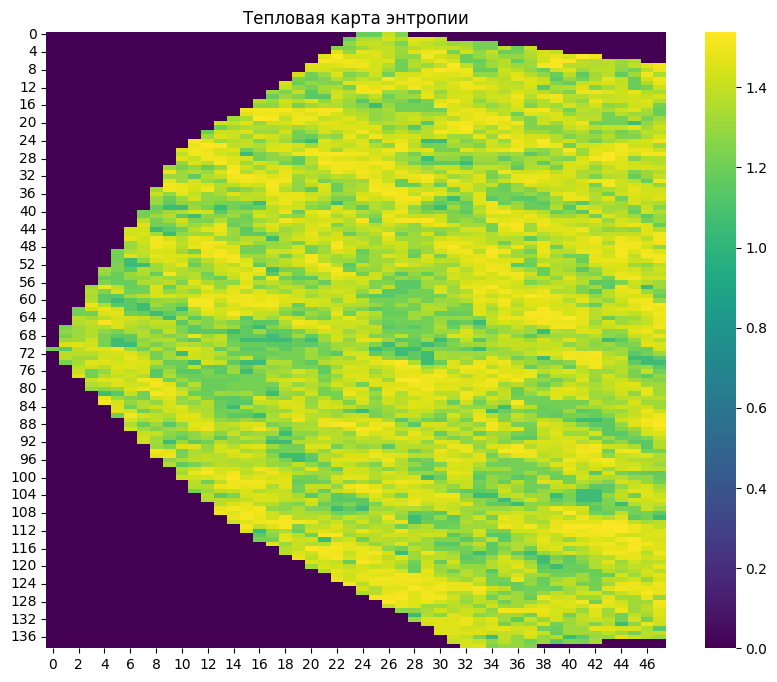

In [8]:
# Усреднение энтропии по слоям k для получения двухмерного DataFrame
entropy_df = pd.DataFrame(entropy_tensor.mean(axis=2))

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(entropy_df, cmap='viridis')
plt.title("Тепловая карта энтропии")
plt.show()
